In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#!pip install citipy Do this for installations.
from scipy.stats import linregress

# Import API key
#from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
#output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
#lat_lngs = []
#cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
 #   city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
    
    # If the city is unique, then add it to a our cities list
  #  if city not in cities:
   #     cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

In [3]:
#city = "London"
#url = f"http://api.openweathermap.org/data/2.5/weather?q="
#Used to check where to look in response
#test_url = f"http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{test_url}appid={weather_api_key}&q="
#test_query_url = test_url + "appid=" + weather_api_key + "&q=" + city

In [4]:
#weather_response = requests.get(test_query_url)
#weather_json = weather_response.json()

In [5]:
#print(weather_json)

In [6]:
#lat = []
#long = []
#max_temp = []
#humid = []
#cloud = []
#wind = []
#country = []
#date = []
#city_s = []
#city_count = 0
#city_set = 1
#print("Beginning Data Retrieval")
#print("------------------------------")
# variable that counts the city that were found.
#for city in cities:
#    response = requests.get(query_url + city).json()
#    try:       
    #print(response)
         #print("Processing Record of ")
#        city_s.append(response["name"])
#        lat.append(response["coord"]["lat"])
#        long.append(response["coord"]["lon"])
#        max_temp.append(response["main"]["temp_max"])
#        humid.append(response["main"]["humidity"])
#        cloud.append(response["clouds"]["all"])
#        wind.append(response["wind"]["speed"])
#        country.append(response["sys"]["country"])
#        date.append(response["dt"])
#        print(f"Processing Record {city_count} of Set {city_set} | {city}")
#        city_count += 1
#        if city_count == 50:
#            city_count = 0
#            city_set += 1
#    except:
#        print("City not found. Skipping...")
#        pass

In [7]:
# for loop of index of cities in sets of 50. And print out city name

In [8]:
#weather_df = pd.DataFrame({"City": city_s,
#                          "Lat": lat,
#                          "Lng": long,
#                          "Max Temp": max_temp,
#                          "Humidity": humid,
#                          "Cloudiness": cloud,
#                          "Wind Speed": wind,
#                          "Country": country,
#                          "Date": date})
#weather_df

In [9]:
# weather_csv = None
#weather_df.to_csv("Weather.csv",index=False)
# print(weather_csv != None)

NameError: name 'weather_df' is not defined

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

In [3]:
w_df = pd.read_csv("Weather.csv")
w_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,290.15,82,6,2.57,ZA,1612404021
1,Georgiyevka,43.0369,74.7114,268.15,93,90,0.63,KZ,1612404021
2,Upernavik,72.7868,-56.1549,246.75,70,0,2.17,GL,1612404021
3,Vaini,-21.2000,-175.2000,300.85,82,100,4.39,TO,1612404022
4,Qaanaaq,77.4840,-69.3632,243.14,64,0,2.20,GL,1612404022
...,...,...,...,...,...,...,...,...,...
540,Whitehorse,60.7161,-135.0538,253.15,77,20,1.03,CA,1612404007
541,Santa Cruz de la Sierra,-17.8000,-63.1667,298.15,83,75,6.69,BO,1612404006
542,Tortolì,39.9256,9.6572,287.04,88,0,5.14,IT,1612404177
543,Flinders,-34.5833,150.8552,301.48,65,46,2.24,AU,1612404177


In [ ]:
w_df.describe()

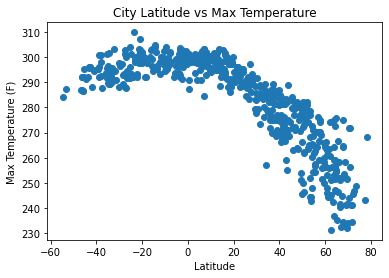

In [4]:
plt.scatter(x=w_df["Lat"],y=w_df["Max Temp"])
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

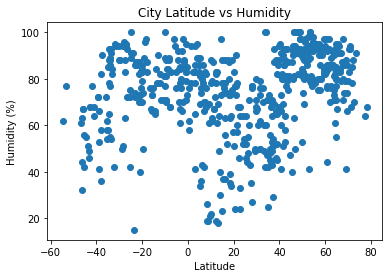

In [5]:
plt.scatter(w_df["Lat"],w_df["Humidity"])
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

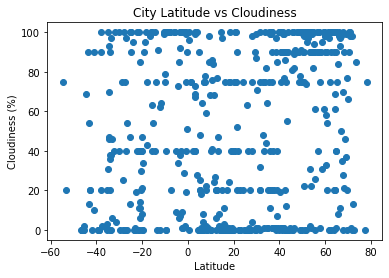

In [6]:
plt.scatter(w_df["Lat"],w_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

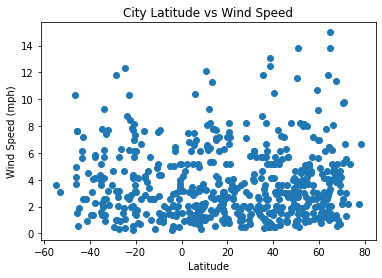

In [7]:
plt.scatter(w_df["Lat"],w_df["Wind Speed"])
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [8]:
north_df = w_df.query("Lat >=0")

In [9]:
north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Georgiyevka,43.0369,74.7114,268.15,93,90,0.63,KZ,1612404021
2,Upernavik,72.7868,-56.1549,246.75,70,0,2.17,GL,1612404021
4,Qaanaaq,77.4840,-69.3632,243.14,64,0,2.20,GL,1612404022
6,Aloleng,16.1307,119.7824,300.66,56,0,3.72,PH,1612404023
8,Araceli,10.5529,119.9913,300.09,79,86,12.09,PH,1612404024
...,...,...,...,...,...,...,...,...,...
536,Znamenka,52.4167,41.4311,274.32,98,100,4.54,RU,1612404174
539,Caraga,9.0000,125.7417,298.75,69,98,2.16,PH,1612404176
540,Whitehorse,60.7161,-135.0538,253.15,77,20,1.03,CA,1612404007
542,Tortolì,39.9256,9.6572,287.04,88,0,5.14,IT,1612404177


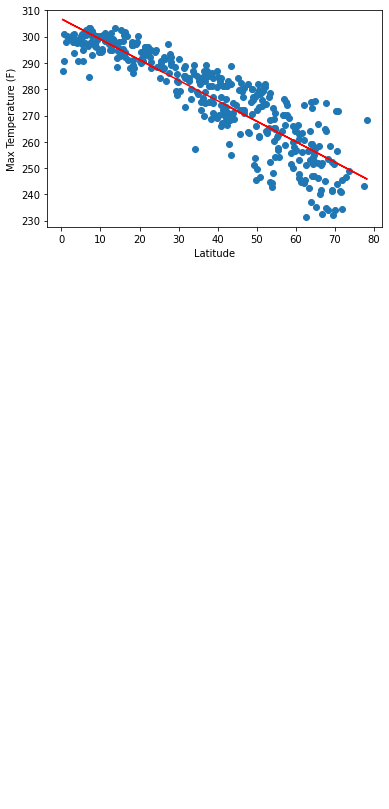

In [19]:
plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Lat"], north_df["Max Temp"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()

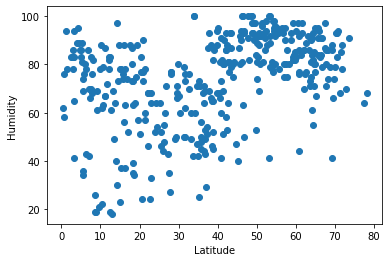

In [11]:
plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

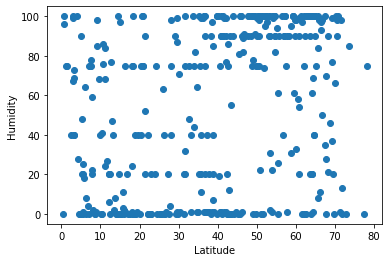

In [12]:
plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

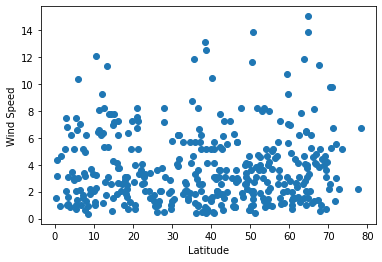

In [13]:
plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [14]:
south_df = w_df.query("Lat <= 0")
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,290.15,82,6,2.57,ZA,1612404021
3,Vaini,-21.2000,-175.2000,300.85,82,100,4.39,TO,1612404022
5,Esperance,-33.8667,121.9000,289.15,55,90,9.26,AU,1612403980
7,Mataura,-46.1927,168.8643,291.91,32,0,3.71,NZ,1612404023
10,Hobart,-42.8794,147.3294,295.93,68,20,2.57,AU,1612403958
...,...,...,...,...,...,...,...,...,...
535,Kismayo,-0.3582,42.5454,297.07,85,51,5.19,SO,1612404174
537,Lima,-12.0432,-77.0282,298.15,78,0,2.57,PE,1612403405
538,Taupo,-38.6833,176.0833,300.93,41,0,1.34,NZ,1612404084
541,Santa Cruz de la Sierra,-17.8000,-63.1667,298.15,83,75,6.69,BO,1612404006


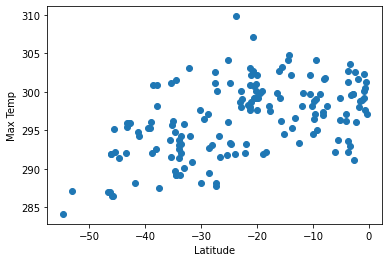

In [16]:
plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

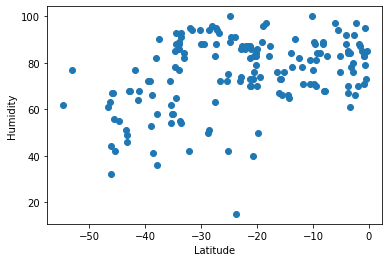

In [17]:
plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

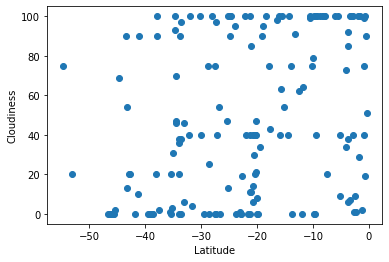

In [18]:
plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

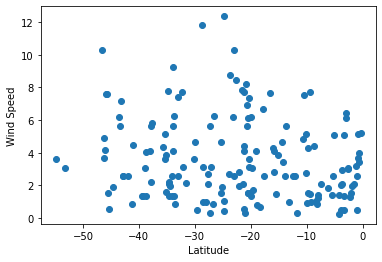

In [15]:
plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [ ]:
#Pretty print output of json
#print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
#query_url_l = f"{url}lat={lat}&lon={lon}&appid={weather_api_key}"


In [ ]:
#!pip install citipy